In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Завантаження даних
data_path = 'BostonHousing.csv'
data = pd.read_csv(data_path)

# Визначення вхідних та вихідних змінних
X = data.drop('medv', axis=1)
y = data['medv']

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Створення моделі лінійної регресії
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Оцінка моделі
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Виведення результатів
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 4.928602182665338


In [3]:
from keras.models import Sequential
from keras.layers import Dense

# Лінійна регресійна модель
model_linear = Sequential()
model_linear.add(Dense(1, input_dim=X_train.shape[1], activation='linear'))

model_linear.compile(optimizer='adam', loss='mean_squared_error')
model_linear.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Оцінка моделі
loss_linear = model_linear.evaluate(X_test, y_test)
print(f'Linear Regression Loss: {loss_linear}')

Epoch 1/50


C:\Users\Roma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 59754.8555   
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44231.8398 
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 31163.5273
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 22695.6934
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 17049.4199
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 11802.9238
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 9367.8262
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 7914.8687
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 5991.6729
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5925.1782 
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4697.6284 
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 5017.9810
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 4435.5312
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 4723.3306
Epoch 15/50
41/41 ━━━━

In [2]:
from sklearn.preprocessing import PolynomialFeatures

# Поліноміальні ознаки
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Поліноміальна регресійна модель
model_poly = Sequential()
model_poly.add(Dense(1, input_dim=X_poly_train.shape[1], activation='linear'))

model_poly.compile(optimizer='adam', loss='mean_squared_error')
model_poly.fit(X_poly_train, y_train, epochs=100, batch_size=10, verbose=1)

# Оцінка моделі
loss_poly = model_poly.evaluate(X_poly_test, y_test)
print(f'Polynomial Regression Loss: {loss_poly}')


C:\Users\Roma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1101929472.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 731674688.0000
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 470536320.0000
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308634528.0000
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145958576.0000
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108580464.0000
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50580096.0000
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35142300.0000
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23981030.0000
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17411204.0000
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14772797.0000
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16120241.0000
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12612952.0000
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


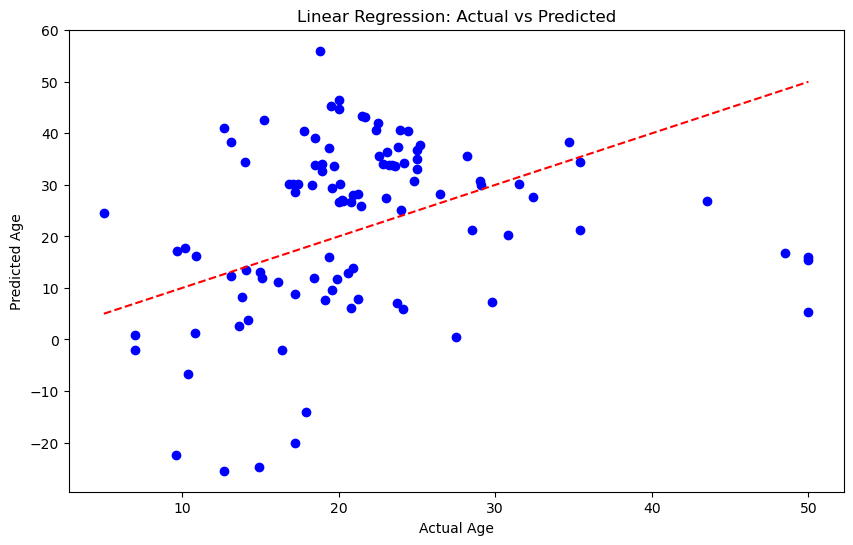

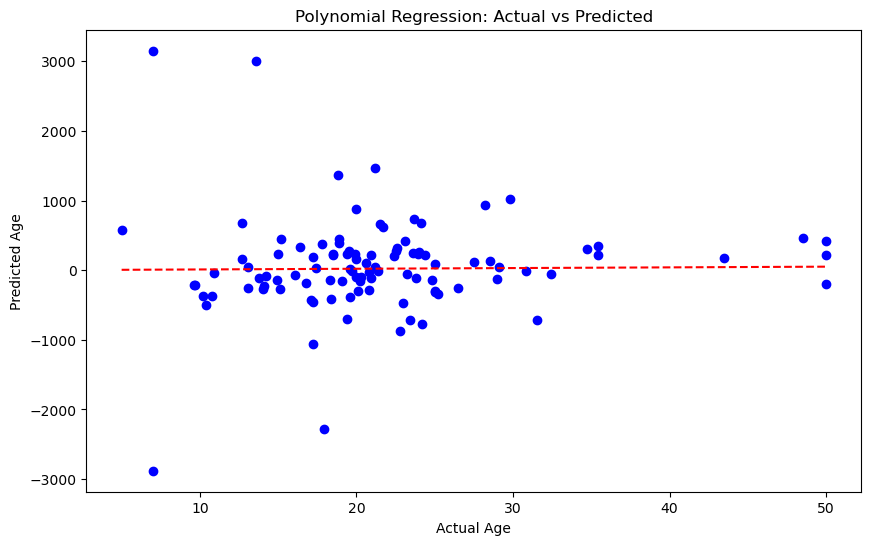

In [4]:
import matplotlib.pyplot as plt

# Передбачення
y_pred_linear = model_linear.predict(X_test).flatten()
y_pred_poly = model_poly.predict(X_poly_test).flatten()

# Графік для лінійної регресії
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Графік для поліноміальної регресії
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()

In [5]:
print(f'Linear Regression MSE: {loss_linear}')
print(f'Polynomial Regression MSE: {loss_poly}')

Linear Regression MSE: 295.0479431152344
Polynomial Regression MSE: 499239.125


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
60000 train samples
10000 test samples
image shape (28, 28)


In [7]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

60000 train samples
10000 test samples
image shape (28, 28)


In [8]:
sample = 0
print('label: ', y_train[sample])
image = x_train[sample]

label:  5


In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Завантажимо дані MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Масштабуємо дані та перетворимо мітки в категоріальні
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Epoch 1/10


C:\Users\Roma\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6543 - loss: 1.3659 - val_accuracy: 0.8641 - val_loss: 0.6009
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8577 - loss: 0.5899 - val_accuracy: 0.8833 - val_loss: 0.4770
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8751 - loss: 0.4850 - val_accuracy: 0.8899 - val_loss: 0.4260
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8839 - loss: 0.4378 - val_accuracy: 0.8962 - val_loss: 0.3981
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8900 - loss: 0.4120 - val_accuracy: 0.8992 - val_loss: 0.3789
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8906 - loss: 0.3980 - val_accuracy: 0.9017 - val_loss: 0.3656
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8949 - loss: 0.3826 - val_accuracy: 0.9054 - val_loss: 0.3546
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8991 - loss: 0.3696 - val_accuracy: 0.9085 - val_

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,852 (30.68 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


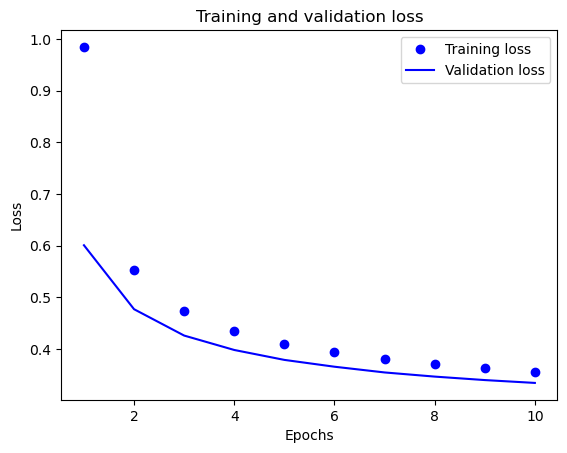

Test score: 0.3342626094818115
Test accuracy: 0.9100000262260437


In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,epochs=10,batch_size=64, validation_data=(x_test, y_test),verbose=1)

print(model.summary())

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


In [13]:
model_relu_adam = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_relu_adam.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

history_relu_adam = model_relu_adam.fit(x_train,
                                        y_train,
                                        epochs=10,
                                        batch_size=64,
                                        validation_split=0.2,
                                        verbose=2)

score_relu_adam = model_relu_adam.evaluate(x_test, y_test, verbose=0)
print('Test score (ReLU, Adam):', score_relu_adam[0])
print('Test accuracy (ReLU, Adam):', score_relu_adam[1])

Epoch 1/10
750/750 - 3s - 4ms/step - accuracy: 0.9086 - loss: 0.3304 - val_accuracy: 0.9504 - val_loss: 0.1757
Epoch 2/10
750/750 - 2s - 2ms/step - accuracy: 0.9571 - loss: 0.1482 - val_accuracy: 0.9596 - val_loss: 0.1354
Epoch 3/10
750/750 - 2s - 2ms/step - accuracy: 0.9700 - loss: 0.1045 - val_accuracy: 0.9651 - val_loss: 0.1174
Epoch 4/10
750/750 - 2s - 2ms/step - accuracy: 0.9768 - loss: 0.0806 - val_accuracy: 0.9707 - val_loss: 0.0974
Epoch 5/10
750/750 - 2s - 2ms/step - accuracy: 0.9824 - loss: 0.0624 - val_accuracy: 0.9707 - val_loss: 0.0922
Epoch 6/10
750/750 - 2s - 2ms/step - accuracy: 0.9854 - loss: 0.0499 - val_accuracy: 0.9731 - val_loss: 0.0866
Epoch 7/10
750/750 - 2s - 2ms/step - accuracy: 0.9880 - loss: 0.0411 - val_accuracy: 0.9748 - val_loss: 0.0854
Epoch 8/10
750/750 - 2s - 2ms/step - accuracy: 0.9901 - loss: 0.0341 - val_accuracy: 0.9734 - val_loss: 0.0896
Epoch 9/10
750/750 - 2s - 2ms/step - accuracy: 0.9923 - loss: 0.0272 - val_accuracy: 0.9756 - val_loss: 0.0855
E

In [14]:
model_tanh_rmsprop = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='tanh'),
    layers.Dense(num_classes, activation='softmax')
])

model_tanh_rmsprop.compile(optimizer='rmsprop',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

history_tanh_rmsprop = model_tanh_rmsprop.fit(x_train,
                                               y_train,
                                               epochs=10,
                                               batch_size=64,
                                               validation_split=0.2,
                                               verbose=2)

score_tanh_rmsprop = model_tanh_rmsprop.evaluate(x_test, y_test, verbose=0)
print('Test score (tanh, RMSprop):', score_tanh_rmsprop[0])
print('Test accuracy (tanh, RMSprop):', score_tanh_rmsprop[1])

Epoch 1/10
750/750 - 3s - 4ms/step - accuracy: 0.9033 - loss: 0.3388 - val_accuracy: 0.9382 - val_loss: 0.2185
Epoch 2/10
750/750 - 2s - 2ms/step - accuracy: 0.9482 - loss: 0.1804 - val_accuracy: 0.9567 - val_loss: 0.1584
Epoch 3/10
750/750 - 2s - 2ms/step - accuracy: 0.9626 - loss: 0.1295 - val_accuracy: 0.9635 - val_loss: 0.1269
Epoch 4/10
750/750 - 2s - 2ms/step - accuracy: 0.9711 - loss: 0.1004 - val_accuracy: 0.9679 - val_loss: 0.1139
Epoch 5/10
750/750 - 2s - 2ms/step - accuracy: 0.9768 - loss: 0.0815 - val_accuracy: 0.9697 - val_loss: 0.1004
Epoch 6/10
750/750 - 2s - 2ms/step - accuracy: 0.9808 - loss: 0.0675 - val_accuracy: 0.9720 - val_loss: 0.0946
Epoch 7/10
750/750 - 2s - 2ms/step - accuracy: 0.9841 - loss: 0.0554 - val_accuracy: 0.9736 - val_loss: 0.0914
Epoch 8/10
750/750 - 2s - 2ms/step - accuracy: 0.9868 - loss: 0.0471 - val_accuracy: 0.9737 - val_loss: 0.0889
Epoch 9/10
750/750 - 2s - 2ms/step - accuracy: 0.9890 - loss: 0.0398 - val_accuracy: 0.9738 - val_loss: 0.0878
E

In [15]:
model_sigmoid_rmsprop = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])

model_sigmoid_rmsprop.compile(optimizer='rmsprop',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

history_sigmoid_rmsprop = model_sigmoid_rmsprop.fit(x_train,
                                                    y_train,
                                                    epochs=10,
                                                    batch_size=64,
                                                    validation_split=0.2,
                                                    verbose=2)

score_sigmoid_rmsprop = model_sigmoid_rmsprop.evaluate(x_test, y_test, verbose=0)
print('Test score (Sigmoid + RMSprop):', score_sigmoid_rmsprop[0])
print('Test accuracy (Sigmoid + RMSprop):', score_sigmoid_rmsprop[1])


Epoch 1/10
750/750 - 3s - 4ms/step - accuracy: 0.8755 - loss: 0.5027 - val_accuracy: 0.9236 - val_loss: 0.2733
Epoch 2/10
750/750 - 2s - 2ms/step - accuracy: 0.9267 - loss: 0.2546 - val_accuracy: 0.9382 - val_loss: 0.2148
Epoch 3/10
750/750 - 2s - 2ms/step - accuracy: 0.9411 - loss: 0.2017 - val_accuracy: 0.9492 - val_loss: 0.1822
Epoch 4/10
750/750 - 2s - 2ms/step - accuracy: 0.9512 - loss: 0.1669 - val_accuracy: 0.9561 - val_loss: 0.1582
Epoch 5/10
750/750 - 2s - 2ms/step - accuracy: 0.9588 - loss: 0.1420 - val_accuracy: 0.9599 - val_loss: 0.1422
Epoch 6/10
750/750 - 2s - 2ms/step - accuracy: 0.9647 - loss: 0.1228 - val_accuracy: 0.9640 - val_loss: 0.1292
Epoch 7/10
750/750 - 2s - 2ms/step - accuracy: 0.9688 - loss: 0.1078 - val_accuracy: 0.9660 - val_loss: 0.1203
Epoch 8/10
750/750 - 2s - 2ms/step - accuracy: 0.9730 - loss: 0.0957 - val_accuracy: 0.9680 - val_loss: 0.1118
Epoch 9/10
750/750 - 2s - 2ms/step - accuracy: 0.9761 - loss: 0.0849 - val_accuracy: 0.9693 - val_loss: 0.1071
E

In [16]:
model =  keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose = 2)
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\Roma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(64, 28, 28, 1), dtype=float32). Expected shape (None, 784), but input has incompatible shape (64, 28, 28, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(64, 28, 28, 1), dtype=float32)
  • training=True
  • mask=None

In [17]:
model =  keras.Sequential()

model.add(layers.Dense(512, input_shape=(784,)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])


history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose = 2)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673,802 (2.57 MB)

 Trainable params: 671,754 (2.56 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(64, 28, 28, 1), dtype=float32). Expected shape (None, 784), but input has incompatible shape (64, 28, 28, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(64, 28, 28, 1), dtype=float32)
  • training=True
  • mask=None

Epoch 1/100


C:\Users\Roma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 - 1s - 130ms/step - loss: 573.0988 - mean_squared_error: 573.0988 - val_loss: 500.1982 - val_mean_squared_error: 500.1982
Epoch 2/100
11/11 - 0s - 6ms/step - loss: 536.6532 - mean_squared_error: 536.6532 - val_loss: 463.3687 - val_mean_squared_error: 463.3687
Epoch 3/100
11/11 - 0s - 6ms/step - loss: 492.7469 - mean_squared_error: 492.7469 - val_loss: 418.6750 - val_mean_squared_error: 418.6750
Epoch 4/100
11/11 - 0s - 6ms/step - loss: 440.2491 - mean_squared_error: 440.2491 - val_loss: 364.9977 - val_mean_squared_error: 364.9977
Epoch 5/100
11/11 - 0s - 6ms/step - loss: 375.7385 - mean_squared_error: 375.7385 - val_loss: 302.5980 - val_mean_squared_error: 302.5980
Epoch 6/100
11/11 - 0s - 6ms/step - loss: 304.2147 - mean_squared_error: 304.2147 - val_loss: 232.6029 - val_mean_squared_error: 232.6029
Epoch 7/100
11/11 - 0s - 6ms/step - loss: 229.5249 - mean_squared_error: 229.5249 - val_loss: 164.3136 - val_mean_squared_error: 164.3136
Epoch 8/100
11/11 - 0s - 6ms/step - loss: 16

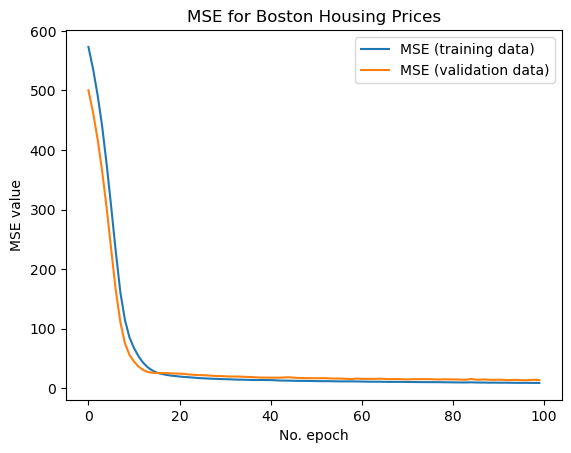

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Завантаження даних
data_path = 'BostonHousing.csv'
data = pd.read_csv(data_path)

# Визначення вхідних та вихідних змінних
X = data.drop('medv', axis=1)
y = data['medv']

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Створення моделі
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Лінійний вихід для регресії

# Компіляція моделі
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Навчання моделі
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Візуалізація результатів
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Boston Housing Prices')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()


In [20]:
model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(input_dim,)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
# Компіляція моделі
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)

C:\Users\Roma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 48000
'y' sizes: 404


In [22]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [23]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
     

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/10
40/40 - 2s - 45ms/step - accuracy: 0.7951 - loss: 0.4607 - val_accuracy: 0.8706 - val_loss: 0.3481
Epoch 2/10
40/40 - 1s - 14ms/step - accuracy: 0.9004 - loss: 0.2824 - val_accuracy: 0.8720 - val_loss: 0.3122
Epoch 3/10
40/40 - 1s - 14ms/step - accuracy: 0.9176 - loss: 0.2296 - val_accuracy: 0.8772 - val_loss: 0.3010
Epoch 4/10
40/40 - 1s - 15ms/step - accuracy: 0.9313 - loss: 0.1969 - val_accuracy: 0.8860 - val_loss: 0.2866
Epoch 5/10
40/40 - 1s - 13ms/step - accuracy: 0.9394 - loss: 0.1754 - val_accuracy: 0.8778 - val_loss: 0.3121
Epoch 6/10
40/40 - 1s - 13ms/step - accuracy: 0.9464 - loss: 0.1581 - val_accuracy: 0.8860 - val_loss: 0.2897
Epoch 7/10
40/40 - 1s - 13ms/step - accuracy: 0.9520 - loss: 0.1443 - val_accuracy: 0.8882 - val_loss: 0.2892
Epoch 8/10
40/40 - 1s - 13ms/step - accuracy: 0.9539 - loss: 0.1341 - val_accuracy: 0.8816 - val_loss: 0.3102
Epoch 9/10
40/40 - 1s - 14ms/step - accuracy: 0.9607 - loss: 0.1217 - val_accuracy: 0.8840 - val_loss: 0.3016
Epoch 10/1

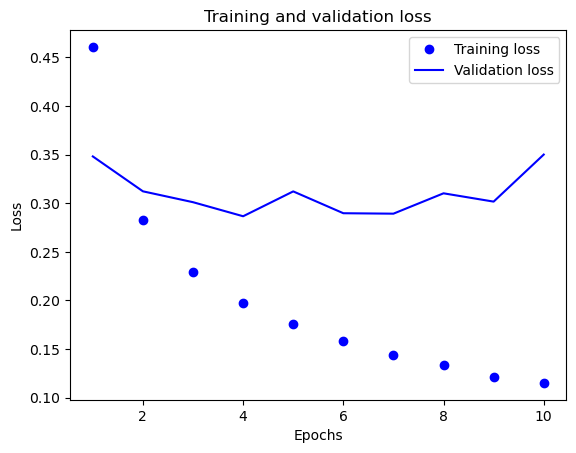

In [27]:
history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.362419068813324
Test accuracy: 0.8654000163078308


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 0.1217 - val_loss: 0.1182
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1186 - val_loss: 0.1148
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1152 - val_loss: 0.1113
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1119 - val_loss: 0.1078
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1086 - val_loss: 0.1041
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1055 - val_loss: 0.1002
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1018 - val_loss: 0.0960
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0977 - val_loss: 0.0916
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0937 - val_loss: 0.0870
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0888 - val_loss: 0.0822
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0842 - val_loss: 0.0774
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0798 - val_loss: 0.0726


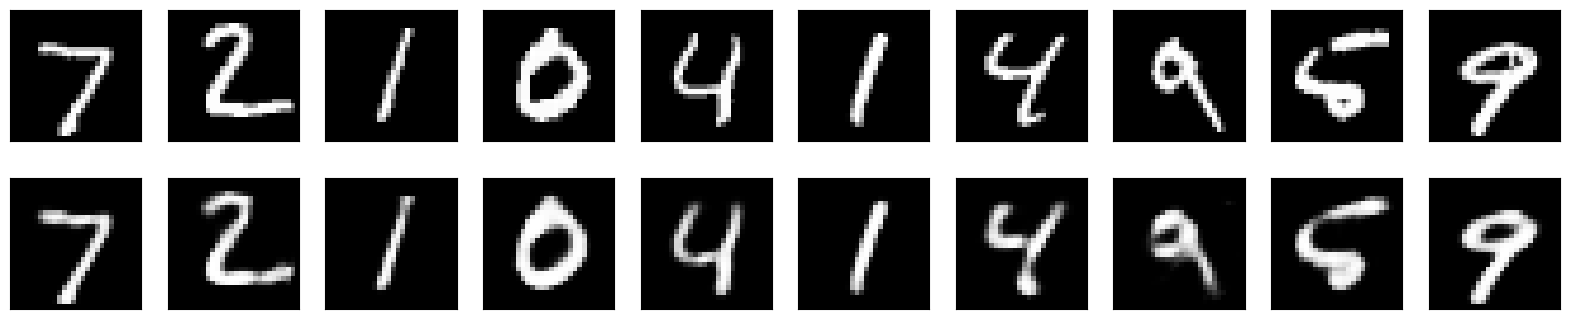

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Завантаження даних
data_path = 'BostonHousing.csv'
data = pd.read_csv(data_path)

# Нормалізація даних
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Визначення вхідних змінних
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Створення архітектури автоенкодера
input_data = Input(shape=(X_train.shape[1],))
encoded = Dense(64, activation='relu')(input_data)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

# Створення моделі автоенкодера
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Навчання автоенкодера
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# Відтворення даних
decoded_data = autoencoder.predict(X_test)

n = 10  # Кількість зображень для відображення
plt.figure(figsize=(20, 4))
for i in range(n):
    # Візуалізація оригінальних зображень
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Візуалізація відтворених зображень
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()